# Day 2 Take Home Assignment

For this assignment we will be dealing with the Pew World Religion Dataset which contains the projected proportion of people in each religious group in each country over time: https://github.com/datasets/world-religion-projections/blob/master/rounded_percentage.csv

You can find the raw data here: https://raw.githubusercontent.com/datasets/world-religion-projections/master/rounded_percentage.csv

**Questions**

1. Load the dataset and call it "religion_projected" as a Pandas dataframe.

2. Subset the data by selecting only those projections that are the "World" region and create a new dataframe called "religion_subset".

3. Using a two sample t-test of means and the "religion_subset" dataset, test the hypothesis that the average projected proportion of Buddhists in the world is greater than the average projected proportion of Christians. Report the t-statistic and p-value.

4. Using the full dataset create a series of boxplots with projected Year on the x axis and proportion of Christians in the Sub-Saharan Africa region on the Y axis.

5. Create a plot with the following parameters: 
 - Projected Year on the x-axis.
 - 3 lines cotaining information about:
    1. The projected proportion of Muslims in Europe
    2. The projected proportion of Muslims in the Asia-Pacific region and;
    3. The projeced proportion of Muslims in the Nortm America region.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as s

# Question 1

religion_projected = pd.read_csv('https://raw.githubusercontent.com/datasets/world-religion-projections/master/rounded_percentage.csv')
religion_projected.head(3)

,Year,Region,Country,Buddhists,Christians,Folk Religions,Hindus,Jews,Muslims,Other Religions,Unaffiliated
0,2010,World,All Countries,7.1,31.4,5.9,15.0,1.0,23.2,1.0,16.4
1,2010,North America,All Countries,1.1,77.4,1.0,1.0,1.8,1.0,1.0,17.1
2,2010,Latin America-Caribbean,All Countries,1.0,90.0,1.7,1.0,1.0,1.0,1.0,7.7


In [0]:
# Question 2

religion_projected['Region'].unique()

array([' World', 'North America', 'Latin America-Caribbean', 'Europe',
       'Middle East-North Africa', 'Sub-Saharan Africa', 'Asia-Pacific'],
      dtype=object)

In [0]:
# Answer - Dimensions of the dataframe

religion_projected.shape # Tells you the # of rows and the # of columns

(1205, 11)

In [0]:
religion_projected['Region'] = religion_projected['Region'].map(lambda x: x.strip())
religion_projected['Region'].unique()

array(['World', 'North America', 'Latin America-Caribbean', 'Europe',
       'Middle East-North Africa', 'Sub-Saharan Africa', 'Asia-Pacific'],
      dtype=object)

In [0]:
religion_subset = religion_projected.loc[religion_projected['Region']=='World']
religion_subset.head()

,Year,Region,Country,Buddhists,Christians,Folk Religions,Hindus,Jews,Muslims,Other Religions,Unaffiliated
0,2010,World,All Countries,7.1,31.4,5.9,15.0,1.0,23.2,1.0,16.4
241,2020,World,All Countries,6.6,31.1,5.6,15.2,1.0,24.9,1.0,15.6
482,2030,World,All Countries,6.1,31.0,5.4,15.2,1.0,26.5,1.0,14.8
723,2040,World,All Countries,5.7,31.1,5.1,15.1,1.0,28.1,1.0,14.0
964,2050,World,All Countries,5.2,31.4,4.8,14.9,1.0,29.7,1.0,13.2


In [0]:
# Answer

religion_projected['Region'].value_counts()

Asia-Pacific                305
Sub-Saharan Africa          260
Europe                      255
Latin America-Caribbean     245
Middle East-North Africa    105
North America                30
World                         5
Name: Region, dtype: int64

In [0]:
# Question 3 - Answer

religion_subset['Buddhists'].mean()

6.139999999999999

In [0]:
# Question 3 - Answer

religion_subset['Christians'].mean()

31.2

In [0]:
# Question 3

# Basic structure. sm.stats.ttest_ind(x1, x2, alternative)

test = sm.stats.ttest_ind(religion_subset['Buddhists'], religion_subset['Christians'], alternative='two-sided') # test object is a list
print(test)

(-73.07644399303152, 1.3698036229786617e-12, 8.0)


In [0]:
# Question 3 - Answer

d = {'t statistic': [test[0]], 'p-value': [test[1]], 'df': [test[2]]}
df = pd.DataFrame(data=d)
df

,t statistic,p-value,df
0,-73.076444,1.369804e-12,8.0


In [0]:
# Question 4

religion_projected['Region'].unique()

array([' World', 'North America', 'Latin America-Caribbean', 'Europe',
       'Middle East-North Africa', 'Sub-Saharan Africa', 'Asia-Pacific'],
      dtype=object)

In [0]:
africa = religion_projected.loc[religion_projected['Region']=='Sub-Saharan Africa']
africa.head()

,Year,Region,Country,Buddhists,Christians,Folk Religions,Hindus,Jews,Muslims,Other Religions,Unaffiliated
5,2010,Sub-Saharan Africa,All Countries,1.0,62.9,3.3,1.0,1.0,30.2,1.0,3.2
12,2010,Sub-Saharan Africa,Angola,1.0,90.5,4.2,1.0,1.0,1.0,1.0,5.1
28,2010,Sub-Saharan Africa,Benin,1.0,53.0,18.1,1.0,1.0,23.8,1.0,5.0
33,2010,Sub-Saharan Africa,Botswana,1.0,72.1,6.0,1.0,1.0,1.0,1.0,20.6
38,2010,Sub-Saharan Africa,Burkina Faso,1.0,22.5,15.4,1.0,1.0,61.6,1.0,1.0


Text(0.5, 1.0, 'Projected Proportion of Christians in Sub-Saharan Africa from 2010 to 2050')

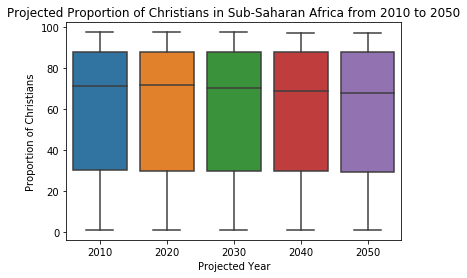

In [0]:
s.boxplot('Year', 'Christians', data=africa)
#Jason's Answer - s.boxplot('Year', 'Christians', religion_projected.loc['Region']=='Sub-Saharan Africa'])

plt.xlabel('Projected Year')
plt.ylabel('Proportion of Christians')
plt.title('Projected Proportion of Christians in Sub-Saharan Africa from 2010 to 2050')

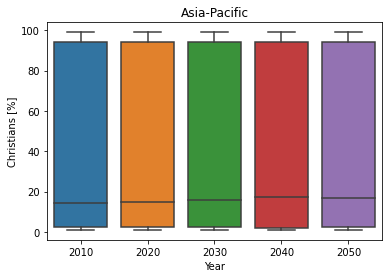

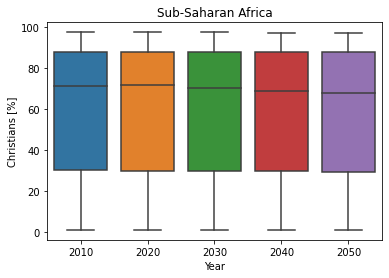

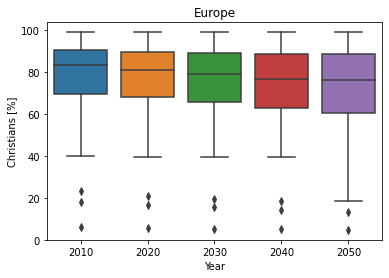

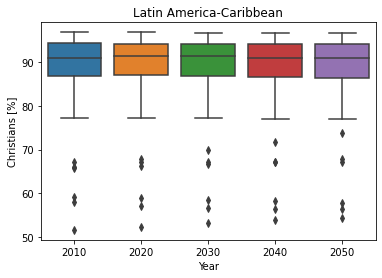

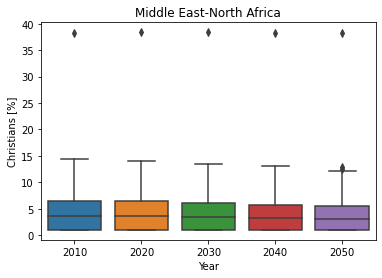

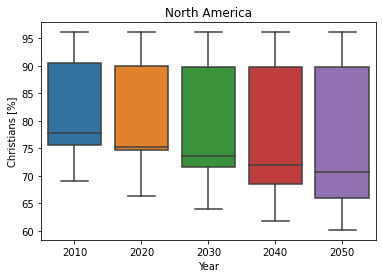

ValueError: ignored

In [0]:
Region_list = ['Asia-Pacific', 'Sub-Saharan Africa', 'Europe', 'Latin America-Caribbean', 'Middle East-North Africa', 'North America', ' World']

for i in Region_list :
    Year = religion_projected['Year'].loc[religion_projected['Region'] == i]
    Christians = religion_projected['Christians'].loc[religion_projected['Region'] == i]
    s.boxplot(x = Year, y = Christians).set_title(i)
    plt.xlabel('Year')
    plt.ylabel('Christians [%]')
    plt.show() 

In [0]:
religion_christ = religion_projected[['Year', 'Christians']]
religion_christ.head(3)

,Year,Christians
0,2010,31.4
1,2010,77.4
2,2010,90.0


In [0]:
religion_christ.groupby('Year').mean()

,Christians
Year,
2010,60.487552
2020,60.068880
2030,59.644398
2040,59.255602
2050,58.900000


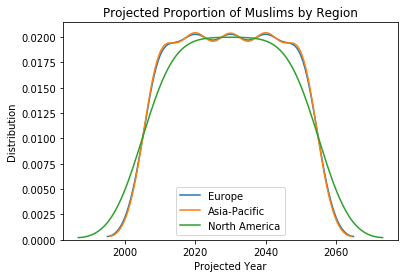

In [0]:
# Question 6 - *Wrong*

#s.distplot(religion_projected['Year'], hist=False)

locations = ['Europe', 'Asia-Pacific', 'North America']

for location in locations:
  subset = religion_projected.loc[religion_projected['Region']==location]
  s.distplot(subset['Year'], hist=False, kde=True, label=location)
  plt.xlabel('Projected Year')
  plt.ylabel('Distribution')
  plt.title('Projected Proportion of Muslims by Region')

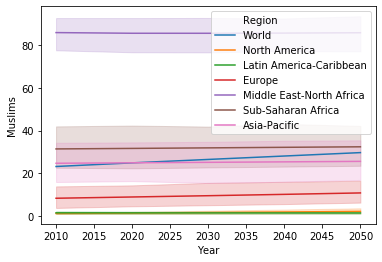

In [0]:
s.lineplot(x='Year', y='Muslims', data=religion_projected, hue="Region")
